# **Classificação com KNN**

* Aprendizado supervisionado
* Mapeamento de um vetor de atributos para um atributo de classe
* Seja $x_i$ um conjunto de $n$ instâncias pertencentes a uma classe $c$ 
  * $x_i$ tem dimensão $d$
  * existem $m$ classes, $c \in {c_1,...,c_m}$
* Aprendizagem é identificar a função $f$ tal que:
  * $f([x_{i1},x_{i2},...,x_{id}]) = c$

## **Classificação de Vinhos**

O Wine dataset é um conjunto de dados que contém informações sobre diferentes tipos de vinho. Ele foi criado por pesquisadores da Universidade de UCI e tornou-se um conjunto de dados popular para treinar algoritmos de aprendizado de máquina.

O Wine dataset inclui informações sobre as características físico-químicas de três tipos diferentes de vinho (vinho tinto, vinho branco e vinho rosé) produzidos na região da Itália.

As características incluídas no conjunto de dados são medidas físico-químicas, como o teor alcoólico, o magnésio e a acidez málica. Nosso objetivo é desenvolver uma máquina preditiva para **prever o tipo do vinho com base nas suas características físico-químicas.**


## **Dicionário de variáveis**

* **Alcohol:**  O teor alcoólico do vinho é a quantidade de álcool presente no vinho, medida em porcentagem. O teor alcoólico é um fator importante na produção de vinho, pois pode afetar o sabor, a estrutura e a acidez do vinho.

* **Malic acid:** A acidez málica é um tipo de acidez presente em muitos tipos de frutas, incluindo uvas. Ela é importante para o sabor e a estrutura do vinho, pois ajuda a equilibrar o teor de açúcar e o pH do vinho.

* **Ash:** A cinza é uma medida da quantidade de minerais presentes no vinho, incluindo potássio, cálcio, sódio, magnésio e outros. A cinza pode afetar o sabor e a estrutura do vinho, bem como a sua cor e transparência.

* **Alcalinity of ash:** A alcalinidade da cinza é a medida da capacidade da cinza de neutralizar ácidos. Ela pode ser influenciada pelos minerais presentes na cinza e pode afetar o pH do vinho.

* **Magnesium:** O magnésio é um mineral presente em vários tipos de frutas, incluindo uvas. Ele pode afetar o sabor e a estrutura do vinho, bem como a sua cor e transparência.

* **Total phenols:** Os fenóis totais são compostos químicos presentes nas uvas e no vinho que podem afetar o sabor, o aroma e a cor do vinho. Eles incluem compostos como tâninos e flavonóides.

* **Flavanoids:** Os flavonóides são compostos químicos presentes nas uvas e no vinho que podem afetar o sabor, o aroma e a cor do vinho. Eles incluem compostos como os taninos e os antocianos.

* **Nonflavanoid phenols:** Os fenóis não flavonóides são compostos químicos presentes nas uvas e no vinho que podem afetar o sabor, o aroma e a cor do vinho. Eles incluem compostos como o ácido cafeico e o ácido p-cumárico.

* **Proanthocyanins:** Os proantocianidinas são compostos químicos presentes nas uvas e no vinho que podem afetar o sabor, o aroma e a cor do vinho. Eles são conhecidos por seu papel na produção de cor vermelha nos vinhos tintos

* **Color intensity:** A intensidade da cor é a medida da cor do vinho, que pode variar de claro a escuro. A cor do vinho pode ser afetada por fatores como a variedade de uva utilizada, o clima, a região de produção e o método de produção.

* **Hue:** O tom é a medida da tonalidade da cor do vinho, que pode variar de vermelho a roxo. A tonalidade da cor do vinho pode ser afetada por fatores como a variedade de uva utilizada, o clima, a região de produção e o método de produção.

* **OD280/OD315 of diluted wines:** OD280/OD315 de vinhos diluídos é uma medida da absorção de luz pelo vinho em duas diferentes faixas de comprimento de onda. Ela pode ser utilizada para determinar a concentração de pigmentos no vinho, como os antocianos, que são responsáveis por sua cor.

* **Proline:** A prolina é um aminoácido presente nas uvas e no vinho. Ela pode afetar o sabor e a estrutura do vinho, bem como a sua cor e transparência. A prolina também pode ser utilizada como marcador para determinar a variedade de uva utilizada na produção do vinho.
  

## 1. Importar bibliotecas necessárias

**Para começar a trabalhar com o conjunto de dados, vamos importar os pacotes Pandas e Matplotlib/Seaborn, que são úteis para carregar e manipular os dados e para visualizar os resultados, respectivamente.**

In [4]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Análise exploratória dos dados

In [5]:
# lendo csv e armazenando em uma variável
dados = pd.read_csv('wine.csv')
dados.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Vamos verificar a frequência da nossa variável alvo `Wine` atráves de um gráfico de barras.


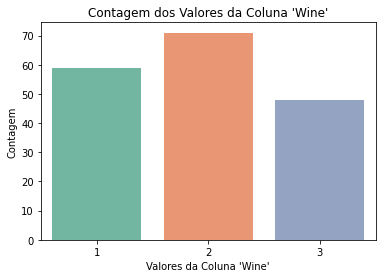

In [6]:
# crie um gráfico de contagem de vinhos usando o seaborn
sns.countplot(data=dados, x='Wine', palette = "Set2")

# adicione um título ao gráfico
plt.title("Contagem dos Valores da Coluna 'Wine'")

# adicione um rótulo ao eixo x
plt.xlabel("Valores da Coluna 'Wine'")

# adicione um rótulo ao eixo y
plt.ylabel("Contagem")

# exiba o gráfico
plt.show()

Veremos agora a força da correlação entre as variáveis.

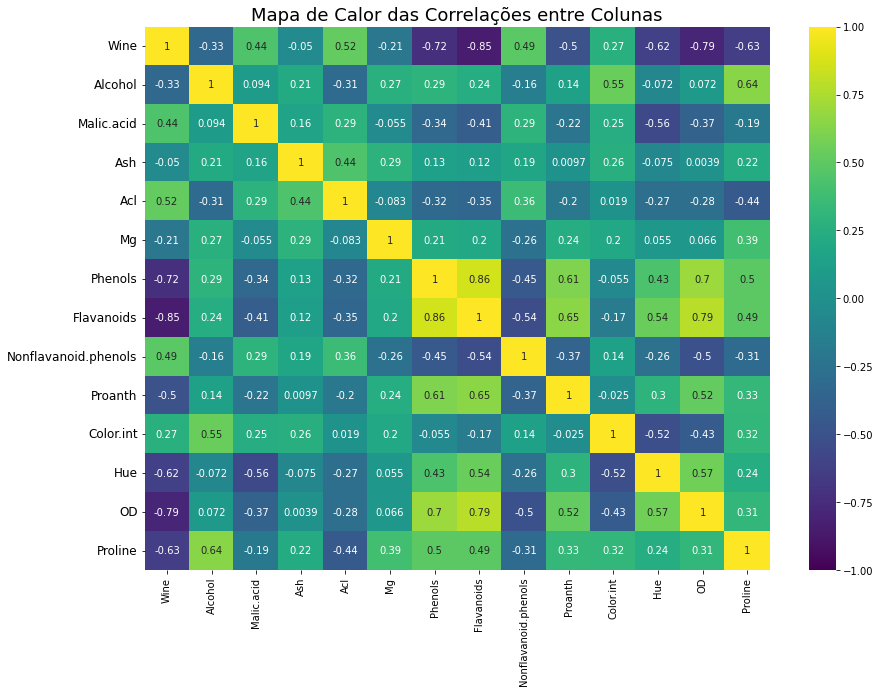

In [7]:
# Crie um gráfico de calor com as correlações entre as colunas do dataframe dados
fig, ax = plt.subplots(figsize=(14, 10))

# Adicione um título ao gráfico
ax.set_title("Mapa de Calor das Correlações entre Colunas", fontsize=18)

# Adicione rótulos de eixo
ax.set_xlabel("Colunas", fontsize=14)
ax.set_ylabel("Colunas", fontsize=14)

# Adicione os rótulos do eixo y na escala inversa
ax.set_yticklabels(dados.columns[::-1], fontsize=12)

# Desenhe o mapa de calor usando a biblioteca seaborn
sns.heatmap(dados.corr(), annot=True, cmap='viridis', ax=ax, vmin=-1, vmax=1)

# Mostre o gráfico
plt.show()

## 3. Organizando dados para modelagem

In [8]:
# dividindo dados em atributos descritores e atributo de classe
X = dados.iloc[:,1:]
X.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [9]:
y = dados.Wine
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Wine, dtype: int64

### Dividindo os dados em treino e teste

In [10]:
from sklearn.model_selection import train_test_split

* Divide a matriz em subconjuntos aleatórios de treino e teste
* test_size: tamanho do subconjunto de teste (em percentual)
* random_state: define a semente para a aleatoriedade (se não definido, semente aleatória)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [12]:
X_train.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840
37,13.05,1.65,2.55,18.0,98,2.45,2.43,0.29,1.44,4.25,1.12,2.51,1105
165,13.73,4.36,2.26,22.5,88,1.28,0.47,0.52,1.15,6.62,0.78,1.75,520
109,11.61,1.35,2.70,20.0,94,2.74,2.92,0.29,2.49,2.65,0.96,3.26,680


In [13]:
y_train.head()

177    3
176    3
37     1
165    3
109    2
Name: Wine, dtype: int64

## 4. Definindo algoritmo de aprendizado

* KNN
   * k = 3 
   * distância euclidiana

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
#definindo modelo
classificador = KNeighborsClassifier(n_neighbors=3,metric='euclidean')

In [16]:
#treinando modelo
classificador.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [17]:
#realizando classificação
classificacao = classificador.predict(X_test)
classificacao

array([2, 2, 2, 1, 1, 1, 2, 1, 1, 3, 1, 2, 1, 3, 2, 1, 3, 3, 3, 1, 2, 3,
       1, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 2, 2, 2])

## 5. Avaliação do classificador

In [18]:
#calculando acurácia
from sklearn.metrics import accuracy_score

In [19]:
acuracia = accuracy_score(y_test,classificacao)
acuracia

0.75

## Validação cruzada


* A forma de avaliação anterior dividiu o dataset em dois subconjuntos disjuntos: treino e teste
  * o treino foi usado para construir o modelo
  * o teste foi usado para avaliar o modelo

* No entanto, devido a aleatoriedade, o resultado pode não ser tão confiável. 

* A validação cruzada k-fold é um método de avaliação que envolve a divisão dos dados de treinamento em k subconjuntos (ou "dobras") de igual tamanho. O modelo é então treinado em k-1 dobras e testado na dobra restante. Este processo é repetido k vezes, com uma dobra diferente sendo usada como a dobra de teste em cada iteração. A pontuação final é a média das pontuações obtidas em cada iteração.

* A validação cruzada k-fold é útil porque fornece uma pontuação média mais precisa do que apenas treinar e testar o modelo uma vez (como feito anteriormente), pois ela permite que todos os dados de treinamento sejam usados para validação pelo menos uma vez.

In [20]:
# montando os folds para validação cruzada
from sklearn.model_selection import KFold

In [21]:
# avaliando modelo com cross validation
from sklearn.model_selection import cross_val_score

In [22]:
#define modelo
classificador = KNeighborsClassifier(n_neighbors=3,metric='euclidean')

In [23]:
#calculando os scores
scores = cross_val_score(classificador,X,y,cv=10)
scores

array([0.66666667, 0.61111111, 0.66666667, 0.66666667, 0.66666667,
       0.66666667, 0.72222222, 0.77777778, 0.88235294, 0.88235294])

In [24]:
scores.mean(),scores.std()

(0.7209150326797384, 0.09062604724441718)